<a href="https://colab.research.google.com/github/StanStarishko/python-programming-for-data/blob/main/Worksheets/8_2_Correlation_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively
---
This worksheet has a set of exercises for practising using the linregress function.  The function will run a linear regression algorithm (or model) to produce data that can be used for predictions.

### Exercise 1 - Clean the data
---
Using the positive psychology dataset - "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
* Read the data and display info
* Visually check the summary to see which columns have null values
* Remove columns with a significant number of null values

**Expected Output**
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          44 non-null     int64  
 1   English      44 non-null     object
 2   sex          44 non-null     object
 3   origin       44 non-null     object
 4   Ukresidence  44 non-null     float64
 5   MAAS         44 non-null     float64
 6   Resilliance  44 non-null     int64  
 7   Wellbeing    44 non-null     int64  
 8   Stress       44 non-null     int64  
 9   selfesteem   44 non-null     int64  
 10  LoC          44 non-null     int64  
 11  sleep        44 non-null     int64  
 12  Year         44 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.6+ KB
```

In [ ]:
import pandas as pd


def is_valid_link(link="",link_name="",autotest=False):
  # link always isn't empty and must have is string
  return_value = link != "" and isinstance(link, str)

  if not return_value and not autotest: # not print if autotest
    print(f"{link_name} is not valid")

  return return_value


def is_valid_df(df=None,name_df="",autotest=False):
  # check that "df" is Data Frame type
  if name_df == "" or not isinstance(name_df, str):
    name_df = "Yuor Data Frame"

  if not isinstance(df, pd.DataFrame) and not autotest: # not print if autotest
    print(f"{name_df} is not valid")
    return False

  return True


# get data from Excel
def get_excel_data(url="",sheet_name="default"):
  # url and sheet name always isn't empty and must have is string

  is_not_valid_url = not is_valid_link(url,"url")
  is_not_valid_sheet_name = not is_valid_link(sheet_name,"sheet name")

  if is_not_valid_url or is_not_valid_sheet_name:
    return False

  if sheet_name == "default":
    df = pd.read_excel(url)
  else:
    df = pd.read_excel(url,sheet_name)

  return df


# get data from CVS
def get_csv_data(url):

  if not is_valid_link(url,"url"):
    return False

  df = pd.read_csv(url)
  return df


# Clean the data
def clean_data(df,threshold=50,only_cleaned=True):

  if not is_valid_df(df,"df"):
    return False

  # Calculate the percentage of null values in each column
  null_percentage = (df.isnull().sum() / len(df)) * 100

  # Drop columns with significant number of null values
  columns_to_drop = null_percentage[null_percentage > threshold].index
  df_cleaned = df.drop(columns=columns_to_drop)

  if only_cleaned:
    return df_cleaned, 0 # Return only the cleaned DataFrame for save memory

  else: # Return the cleaned DataFrame and the null percentage
    return df_cleaned,null_percentage


##################################################
# Load the dataset
##################################################
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = get_csv_data(url)

# Display dataset info and null values
df.info()
print("\nNull Values Summary:")
print(df.isnull().sum())

# Visualize the null value summary in percentage
df_cleaned,null_percentage = clean_data(df,threshold=50,only_cleaned=False)
print("\nNull Values Percentage:")
print(null_percentage)

# Display the cleaned dataframe info
print("\nColumns removed:", list(columns_to_drop))
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            44 non-null     int64  
 1   English        44 non-null     object 
 2   firstlanguage  18 non-null     object 
 3   sex            44 non-null     object 
 4   origin         44 non-null     object 
 5   Ukresidence    44 non-null     float64
 6   MAAS           44 non-null     float64
 7   Resilliance    44 non-null     int64  
 8   Wellbeing      44 non-null     int64  
 9   Stress         44 non-null     int64  
 10  selfesteem     44 non-null     int64  
 11  LoC            44 non-null     int64  
 12  sleep          44 non-null     int64  
 13  Year           44 non-null     int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 4.9+ KB

Null Values Summary:
Age               0
English           0
firstlanguage    26
sex               0
origin            0
Ukresiden

### Exercise 2 - Check for outliers
---
We briefly mentioned outliers in the R and stats presentation. An outlier is an abnormal value in the data that is either extremely high or low compared to the rest of the data. Outliers can skew results.

A value is considered to be an outlier if it is any of:
*  greater than `Q3 + 1.5 * interquartile_range`
*  less than `Q1 - 1.5 * interquartile_range`
*  more than 2 standard deviations from the mean

Q3 = value at 75% of data, Q1 = value at 25% of the data, IQR is the interquartile range, the difference between Q3 and Q1.  

We can check for outliers using a Box plot, in which:

*  the upper line on the boxplots arm (whisker) is `Q3 + 1.5 * IQR`
*  the lower line on the boxplots arm (whisker) is `Q1 - 1.5 * IQR`
*  the middle line of the box is the median
*  the top of the box is Q3
*  the bottom of the box is Q1
*  outliers are shown as circles or dots, either above or below the whiskers

1. Using either matplotlib or Seaborn, create a boxplot of `Wellbeing` and a separate boxplot of `selfesteem`
2. use `plt.show()` to separate the graphs
3. Can you see any outliers? Are they high or low?

**Expected Output**

https://docs.google.com/presentation/d/e/2PACX-1vQBji5MrvtdeXCtP2PJzhPLKqXXuLMYjy4nCIzXpJLoye38IzetN5amZd6pU9e4io3bTUvE6Slg_hIk/pub?start=false&loop=false&delayms=3000


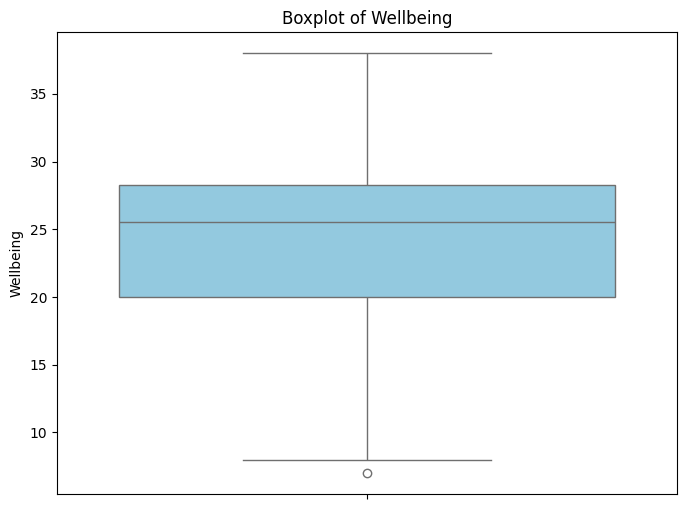

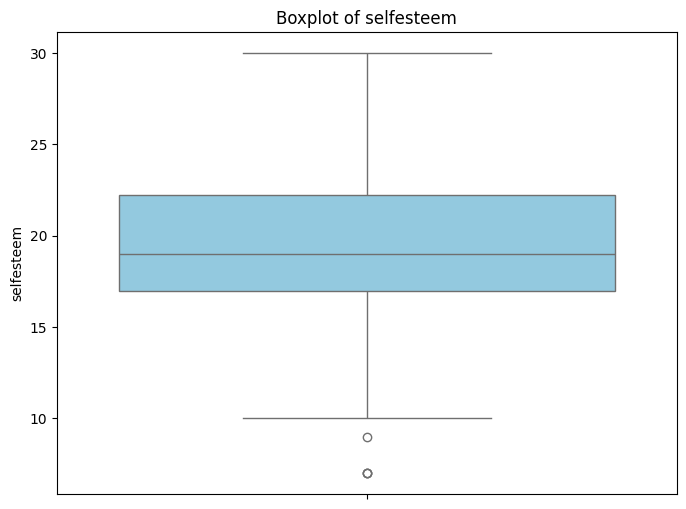

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def creating_boxplot(df,box_name=""):

  # Check if the params is valid
  if not is_valid_df(df,"df") or not is_valid_link(box_name,"Box Name"):
    return False

  # Check if the data has been loaded and the required columns exist
  if not box_name in df.columns:
      print("Columns not found in the dataset!")
      return False

  # Create boxplot for Wellbeing
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df[box_name], color='skyblue')
  plt.title(f"Boxplot of {box_name}")
  plt.ylabel(f"{box_name}")
  plt.show()  # To separate the graphs
  print()

  return True


##########################################
# execute procedure from main context
##########################################
result = creating_boxplot(df,'Wellbeing')
result = creating_boxplot(df,'selfesteem')



### Exercise 3 - Removing outliers
---
Create a function called `remove_outliers(df, column)` to remove outliers from a given column in a given dataframe.  Use the function to remove outliers from the `Wellbeing` column.  Then use the function to remove the outliers from the `selfesteem` columns.

The function will:

1. Store the values for Q1 and Q3 in 2 separate variables   *Hint: you can use `.quantile(0.75)` and `.quantile(0.25)` to get Q3 and Q1 respectively*  
2. Calculate the interquartile range(IQR) using `Q3` - `Q1`  
3. Create a variable which will store the value for the `upper_limit` (`Q3 + 1.5 * IQR`)  
4. Create another variable which assigns the value for the `lower_limit` (`Q1  - 1.5 * IQR`)  
5. Filter all rows where values are NOT outliers into a new dataframe called `df_normal`
6. Return `df_normal`

Run the function twice, once for each column.
Show the info for the resulting dataframe

**Test output**:  
```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          41 non-null     int64  
 1   English      41 non-null     object
 2   sex          41 non-null     object
 3   origin       41 non-null     object
 4   Ukresidence  41 non-null     float64
 5   MAAS         41 non-null     float64
 6   Resilliance  41 non-null     int64  
 7   Wellbeing    41 non-null     int64  
 8   Stress       41 non-null     int64  
 9   selfesteem   41 non-null     int64  
 10  LoC          41 non-null     int64  
 11  sleep        41 non-null     int64  
 12  Year         41 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.5+ KB
```


In [ ]:
def remove_outliers(df, column):
    """
    Remove outliers from the given column in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame from which to remove outliers.
    column (str): The column from which to remove outliers.

    Returns:
    pd.DataFrame: A DataFrame with outliers removed from the specified column.
    """
    # Check if the column exists in the DataFrame
    if column not in df.columns:
        print(f"Column {column} does not exist in the DataFrame")
        return False

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Calculate upper and lower limits for outliers
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    # Filter out rows where the column values are within the limits
    df_normal = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

    return df_normal


##########################################
# execute procedure from main context
##########################################
df_cleaned,null_percentage = clean_data(df,threshold=50,only_cleaned=False)

# Remove outliers from 'Wellbeing' column
df_no_outliers_wellbeing = remove_outliers(df_cleaned, 'Wellbeing')
if not isinstance(df_no_outliers_wellbeing,bool):
  print("DataFrame info after removing outliers from 'Wellbeing':")
  df_no_outliers_wellbeing.info()

# Remove outliers from 'selfesteem' column
df_no_outliers_selfesteem = remove_outliers(df_cleaned, 'selfesteem')
if not isinstance(df_no_outliers_selfesteem,bool):
  print("DataFrame info after removing outliers from 'selfesteem':")
  df_no_outliers_selfesteem.info()


DataFrame info after removing outliers from 'Wellbeing':
<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          43 non-null     int64  
 1   English      43 non-null     object 
 2   sex          43 non-null     object 
 3   origin       43 non-null     object 
 4   Ukresidence  43 non-null     float64
 5   MAAS         43 non-null     float64
 6   Resilliance  43 non-null     int64  
 7   Wellbeing    43 non-null     int64  
 8   Stress       43 non-null     int64  
 9   selfesteem   43 non-null     int64  
 10  LoC          43 non-null     int64  
 11  sleep        43 non-null     int64  
 12  Year         43 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.7+ KB
DataFrame info after removing outliers from 'selfesteem':
<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 0 to 43
Data columns (total 13 columns

### Exercise 4 - Checking for normality
---

Linear regressions assume that the data is normally distributed (Gaussian) and therefore has the bell curved shape and a similar mean and median (this would be true if the mean was centred like it is in Gaussian data).

1. Use Seaborn's **distplot** to check the shape of the `Wellbeing` and `selfesteem` columns.  Do they look normally distributed (Gaussian)?

`sns.distplot(dataframe['column'])`

*Hint: if you add, `bins= ...` as a parameter, you can set the number of bins (bars) in your chart*

2. Compare the mean and median of `Wellbeing` - are they similar?
3. Compare the mean and median of `selfesteem` - are they similar?





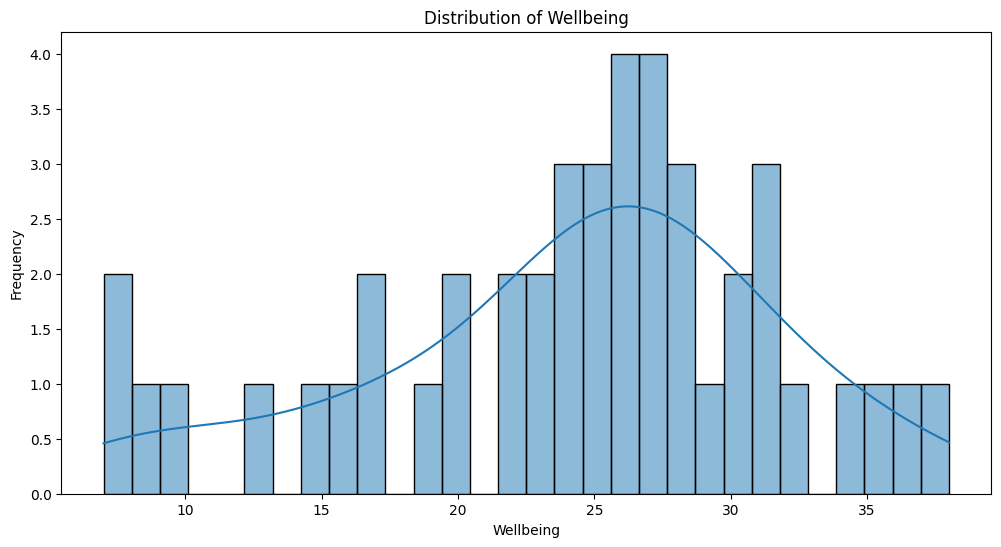


Mean of Wellbeing: 24.113636363636363
Median of Wellbeing: 25.5
Mean and Median are not similar




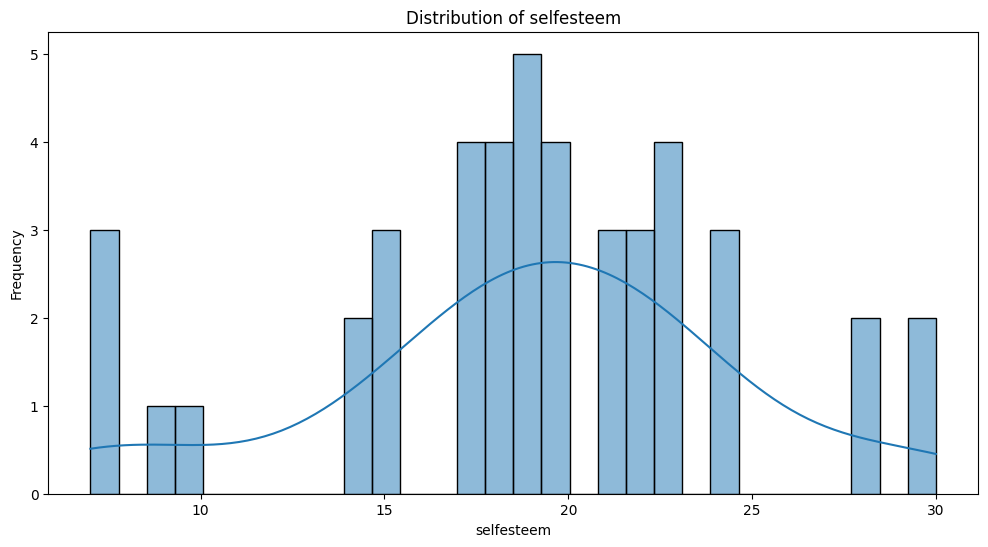


Mean of selfesteem: 19.022727272727273
Median of selfesteem: 19.0
Mean and Median are not similar



In [ ]:
# Check for normality using Seaborn's distplot
def plot_distribution(df, column):
    if not is_valid_df(df, "df") or not is_valid_link(column, "column"):
        return

    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], kde=True, bins=30)  # Use histplot with kde for a smooth distribution curve
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    print()


# Compare mean and median
def print_mean_median(df, column):
    if not is_valid_df(df, "df") or not is_valid_link(column, "column"):
        return

    mean_value = df[column].mean()
    median_value = df[column].median()

    print(f"Mean of {column}: {mean_value}")
    print(f"Median of {column}: {median_value}")
    print(f"Mean and Median are {'similar' if abs(mean_value - median_value) < 1e-5 else 'not similar'}\n")


##########################################
# execute procedure from main context
##########################################

# Plot distributions and print mean and median for each column
plot_distribution(df, 'Wellbeing')
print_mean_median(df, 'Wellbeing')
print()

# Plot distributions and print mean and median for each column
plot_distribution(df, 'selfesteem')
print_mean_median(df, 'selfesteem')


### Exercise 5 - Check which variables are most highly correlated
---
Using the `dataframe.corr()` function and Seaborn's heatmap, create a correlation heatmap matrix to check which variables are most highly correlated.

A correlation matrix finds the correlation coefficient between every variable pair combination in a set of variables.  A correlation heatmap shows the degree of correlation between variables using a colour scale.

*The matrix and heatmap will always show the correlation coefficients between each variable and itself, which will have a correlation coefficient of 1.*
  
Values closest to 1 mean the variables are positively correlated with each other with 1 meaning 100% correlated


Values close to -1 mean the variables are negatively correlated with each other with -1 meaning 100% negatively correlated

1. create the correlation matrix assigning it to a variable called **correlation_matrix** using the .corr() function and rounding to 2 decimal places:

  `correlation_matrix = dataframe.corr().round(2)`

*This will create a matrix similar to the linear regression matrix created in the numpy worksheet, but with more than two variables.*

2. create a heatmap of the correlation matrix using:

 `sns.heatmap(data=data_variable, annot=True)`

*Hint: Use `annot = True` to print the correlation values inside the square*

3. Which variables are the most highly correlated with each other (closest to 1 or -1)?

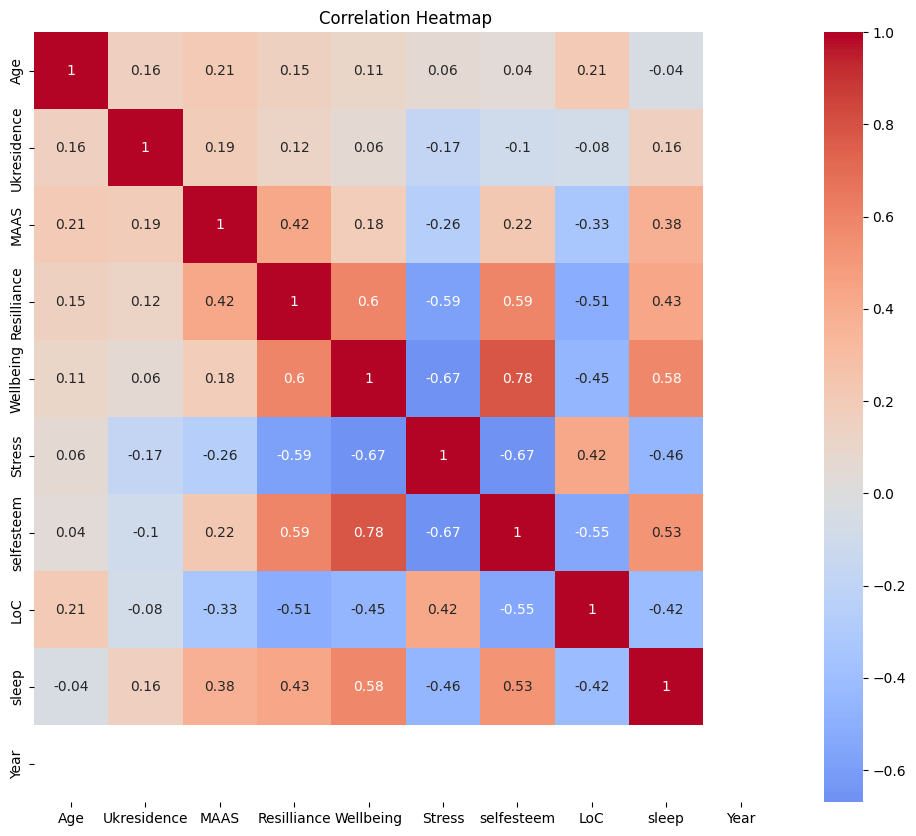


Highly Correlated Variables:
             MAAS  Resilliance  Wellbeing  Stress  selfesteem   LoC  sleep
MAAS          NaN         0.42        NaN     NaN         NaN   NaN    NaN
Resilliance  0.42          NaN       0.60     NaN        0.59   NaN   0.43
Wellbeing     NaN         0.60        NaN     NaN        0.78   NaN   0.58
Stress        NaN          NaN        NaN     NaN         NaN  0.42    NaN
selfesteem    NaN         0.59       0.78     NaN         NaN   NaN   0.53
LoC           NaN          NaN        NaN    0.42         NaN   NaN    NaN
sleep         NaN         0.43       0.58     NaN        0.53   NaN    NaN


In [ ]:

# Calculate the correlation matrix
def create_correlation_heatmap(df):
    if not is_valid_df(df, "df"):
        return


    # Filter to keep only numeric columns
    df_numeric = df.select_dtypes(include=['number'])

    if df_numeric.empty:
        print("No numeric columns found in the DataFrame.")
        return False

    # Calculate correlation matrix
    correlation_matrix = df_numeric.corr().round(2)

    # Create a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.show()
    print()

    return correlation_matrix


# Print the most highly correlated pairs
def print_highly_correlated(correlation_matrix, threshold=0.01):
    if not is_valid_df(correlation_matrix, "correlation_matrix"):
        return

    # Find highly correlated pairs
    high_corr = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix < 1)]
    print("Highly Correlated Variables:")
    print(high_corr.dropna(how='all').dropna(axis=1, how='all'))


##########################################
# execute procedure from main context
##########################################

# Create the heatmap and get the correlation matrix
correlation_matrix = create_correlation_heatmap(df_cleaned)

# Print the most highly correlated variables
print_highly_correlated(correlation_matrix,threshold=0.4)

### Exercise 6 - Linear regression
---
Using the `linregress` function, perform a linear regression on the Wellbeing and selfesteem columns   
To do this:

1. `from scipy.stats import linregress`
2. create a variable 'x' which stores the Wellbeing column
3. create a variable 'y' which stores the selfesteem column
4. create a variable called regression and assign the result of running the linregress function with x, y as its parameters ( linregress(x,y) )
5. display the regression
6. display the slope (regression.slope)
7. display the y-intercept
8. display the r^2 value (rvalue**2)
9. display the pvalue


In [ ]:
from scipy.stats import linregress

# linear regression
def linear_regression(df,name_x="",name_y="",not_display=False):

  if not is_valid_df(df) or not is_valid_link(name_x,"Data X") or not is_valid_link(name_y,"Data Y"):
    return False


  # Extract the 'Age' and 'Income' columns
  data_x = df[name_x]
  data_y = df[name_y]

  # Run the linear regression
  regression = linregress(data_x, data_y)
  if not_display:
    return regression

  # Display the regression result
  print(regression)

  # Display the slope, intercept, and rvalue
  print(f"Slope: {regression.slope}")
  print(f"Intercept: {regression.intercept}")
  print(f"R-value (Correlation Coefficient): {regression.rvalue}")
  print(f"P-value: {regression.pvalue}")
  print(f"Standard Error: {regression.stderr}")
  print(f"Y-intercept: {regression.intercept}")
  print(f"R-squared: {regression.rvalue ** 2}")


  return regression


##########################################
# execute procedure from main context
##########################################

name_x = 'Wellbeing'
name_y = 'selfesteem'
regression = linear_regression(df,name_x,name_y)

LinregressResult(slope=0.5813493777048488, intercept=5.004279778526259, rvalue=0.7796119998459331, pvalue=4.5026632927404693e-10, stderr=0.07205940740749374, intercept_stderr=1.8162622661196786)
Slope: 0.5813493777048488
Intercept: 5.004279778526259
R-value (Correlation Coefficient): 0.7796119998459331
P-value: 4.5026632927404693e-10
Standard Error: 0.07205940740749374
Y-intercept: 5.004279778526259
R-squared: 0.6077948703037752


### Exercise 7 - understanding the output
---
The r^2 value (rvalue**2) helps us understand how much our independent variable (x) is predicting our dependent variable (y). The closer to 1 the rvalue is the more  the change in Y is explained by X. So an rvalue of 0.7 means that 70% of Y's variance can be explained by X.

Our pvalue shows how significant our model is, if the pvalue is < 0.05 then the model is significant.

On this basis, write below the findings of the above regression.
* is the model significant?
* how much is the change in y explained by x?

**Write about the findings here**:

### Findings from the Linear Regression:

1. **Significance of the Model**:
   - The **p-value** is `4.5026632927404693e-10`, which is far less than `0.05`. This means that the model is **statistically significant**. The probability that the observed relationship between `Wellbeing` and `Selfesteem` is due to random chance is extremely low.

2. **Explaining the Change in Y by X**:
   - The **R-squared value** is `0.6077948703037752`. This means that **60.78%** of the variance in `Selfesteem` (Y) can be explained by the changes in `Wellbeing` (X).
   - In other words, **Wellbeing** can account for around 61% of the variance in **Selfesteem**, which indicates a moderately strong relationship between the two variables.

### Conclusion:
- The model is highly significant due to the very low p-value.
- The R-squared value suggests that the **Wellbeing** variable explains about 61% of the variation in **Selfesteem**, which is a considerable proportion. Therefore, the change in **Selfesteem** is moderately well explained by changes in **Wellbeing**.

### Exercise 8 - Linear regression with other variables
---

Referring back to the correlation heatmap..  
*  Repeat Exercise 6 but with the variables that were the most highly correlated according to the heatmap.   
* write a comment comparing the results of this regression with the one you created in exercise 6

In [ ]:
name_x = 'Age'
name_y = 'sleep'

# Run the linear regression
regression = linear_regression(df, name_x, name_y)


LinregressResult(slope=-0.0338793720882861, intercept=21.627386044800147, rvalue=-0.036085980035009346, pvalue=0.8161093147332639, stderr=0.14477355869050365, intercept_stderr=4.054893321164338)
Slope: -0.0338793720882861
Intercept: 21.627386044800147
R-value (Correlation Coefficient): -0.036085980035009346
P-value: 0.8161093147332639
Standard Error: 0.14477355869050365
Y-intercept: 21.627386044800147
R-squared: 0.0013021979550870931


**Comment here**:

#### Comparison with Previous Regression (Exercise 6)

In Exercise 6, we analyzed the regression between `Wellbeing` and `selfesteem`. The findings were:
- **Slope**: 0.5813
- **Intercept**: 5.0043
- **R-value (Correlation Coefficient)**: 0.7796
- **P-value**: 4.50e-10
- **R-squared**: 0.6078

**Comparison**:
- **Significance**: The regression between `Wellbeing` and `selfesteem` was statistically significant (p-value < 0.05), whereas the regression between `Age` and `sleep` was not (p-value = 0.8161).
- **Explained Variance**: The `Wellbeing` and `selfesteem` model explained 60.78% of the variance in selfesteem, indicating a strong relationship. In contrast, the `Age` and `sleep` model explained only 0.13% of the variance, suggesting a very weak relationship.
- **Correlation**: The `Wellbeing` and `selfesteem` variables had a high positive correlation (r-value = 0.7796), whereas the `Age` and `sleep` variables had a very weak negative correlation (r-value = -0.0361).

### Summary
The regression analysis for `Age` and `sleep` revealed a very weak and statistically insignificant relationship, which is in stark contrast to the significant and stronger correlation found between `Wellbeing` and `selfesteem`. This highlights the importance of examining correlation and significance when interpreting linear regression results, and it suggests that `Age` and `sleep` may not be a meaningful pair for predictive modeling.

### Exercise 9 - Plotting a line of best fit
---
To create a line of best fit we use y = slope\*x + intercept.

Using matplotlib (dont forget to import it):

* create a scatter graph between Wellbeing and selfesteem
* plot a line of best fit using the results in exercise 6  (y = slope * x + intercept)  

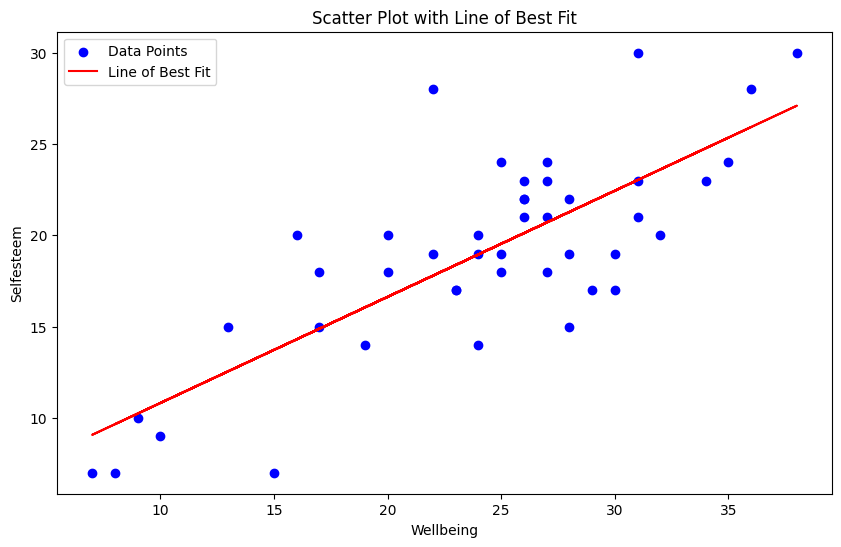

In [ ]:
name_x = 'Wellbeing'
name_y = 'selfesteem'
regression = linear_regression(df, name_x, name_y, not_display=True)

# Extract regression parameters
slope = regression.slope
intercept = regression.intercept

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[name_x], df[name_y], color='blue', label='Data Points')

# Plot the line of best fit
x_values = df[name_x]
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', label='Line of Best Fit')

# Add labels and title
plt.xlabel('Wellbeing')
plt.ylabel('Selfesteem')
plt.title('Scatter Plot with Line of Best Fit')
plt.legend()

# Show plot
plt.show()

### Exercise 10 - using Seaborn to plot a regression line
---

Use Seaborn's `regplot` function to create a scatter graph with line of best fit of the variables you used in Exercise 8.

* Compare the 'Wellbeing' and 'selfesteem' graph to the graph you created in Exercise 9

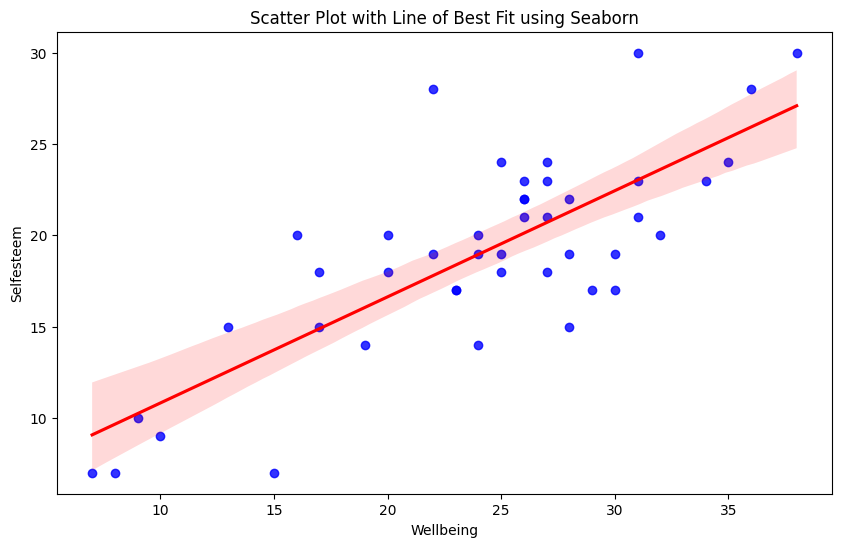

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Wellbeing', y='selfesteem', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Wellbeing')
plt.ylabel('Selfesteem')
plt.title('Scatter Plot with Line of Best Fit using Seaborn')
plt.show()


### Comparison with Exercise 9

- **Graph Created in Exercise 9**:
  - A scatter plot with a manually plotted line of best fit was created using Matplotlib.
  - The regression line was plotted by calculating \( y = \text{slope} \times x + \text{intercept} \) manually.

- **Graph Created in Exercise 10**:
  - The scatter plot with a regression line was created using Seaborn's `regplot`.
  - Seaborn automatically computes and plots the line of best fit, which simplifies the process and often results in more polished visuals.

### Summary

**Seaborn vs. Matplotlib**:
- **Seaborn**: Provides an easy way to create aesthetically pleasing plots with minimal code. The `regplot` function integrates the regression line with the scatter plot efficiently.
- **Matplotlib**: Offers more control over individual plot elements but requires additional code to compute and plot the regression line manually.

Both methods produce similar results, but Seaborn's `regplot` is easier to use and has more visualization and presentation capabilities.